In [1]:
import ffsim
from passive_extended_matchgate_simulator.raw_estimation import raw_estimate, raw_estimate_udv_single
from passive_extended_matchgate_simulator.utils import (make_parameterized_controlled_phase_circuit, 
                                                        ucj_to_compatible,
                                                        get_bitstrings_and_probs, extract_circuit_data)

norb, nelec = 36, (27, 27)
mean, variance = 0, .1
circuit = make_parameterized_controlled_phase_circuit(norb, nelec, mean, variance, reduced_interaction=True)
compatible1 = ucj_to_compatible(circuit)
compatible2 = ucj_to_compatible(circuit)

epsilon, delta, p = .1, .01, 1
bitstrings = ffsim.addresses_to_strings(range(5), norb, nelec)


old_answer = raw_estimate(
    circuit=compatible1,
    outcome_states=[bitstrings[0]],
    epsilon=epsilon,
    delta=delta,
    p=p,
    reuse_trajectories=False
)

answer = raw_estimate_udv_single(circuit=compatible2,
    outcome_states=bitstrings[0],
    epsilon=epsilon,
    delta=delta,
    p=p,
)
print(old_answer, answer)


3
hello from raw_estimate_batch
total computation time (internal) = 13.23191464
[0.44077788] 0.43027727355862183
total computation time (udv) = 0.139354779
precomputation time = 0.001679165
hashmap time = 0.06364386
determinant time = 0.073409088
reduction time = 0.000622666


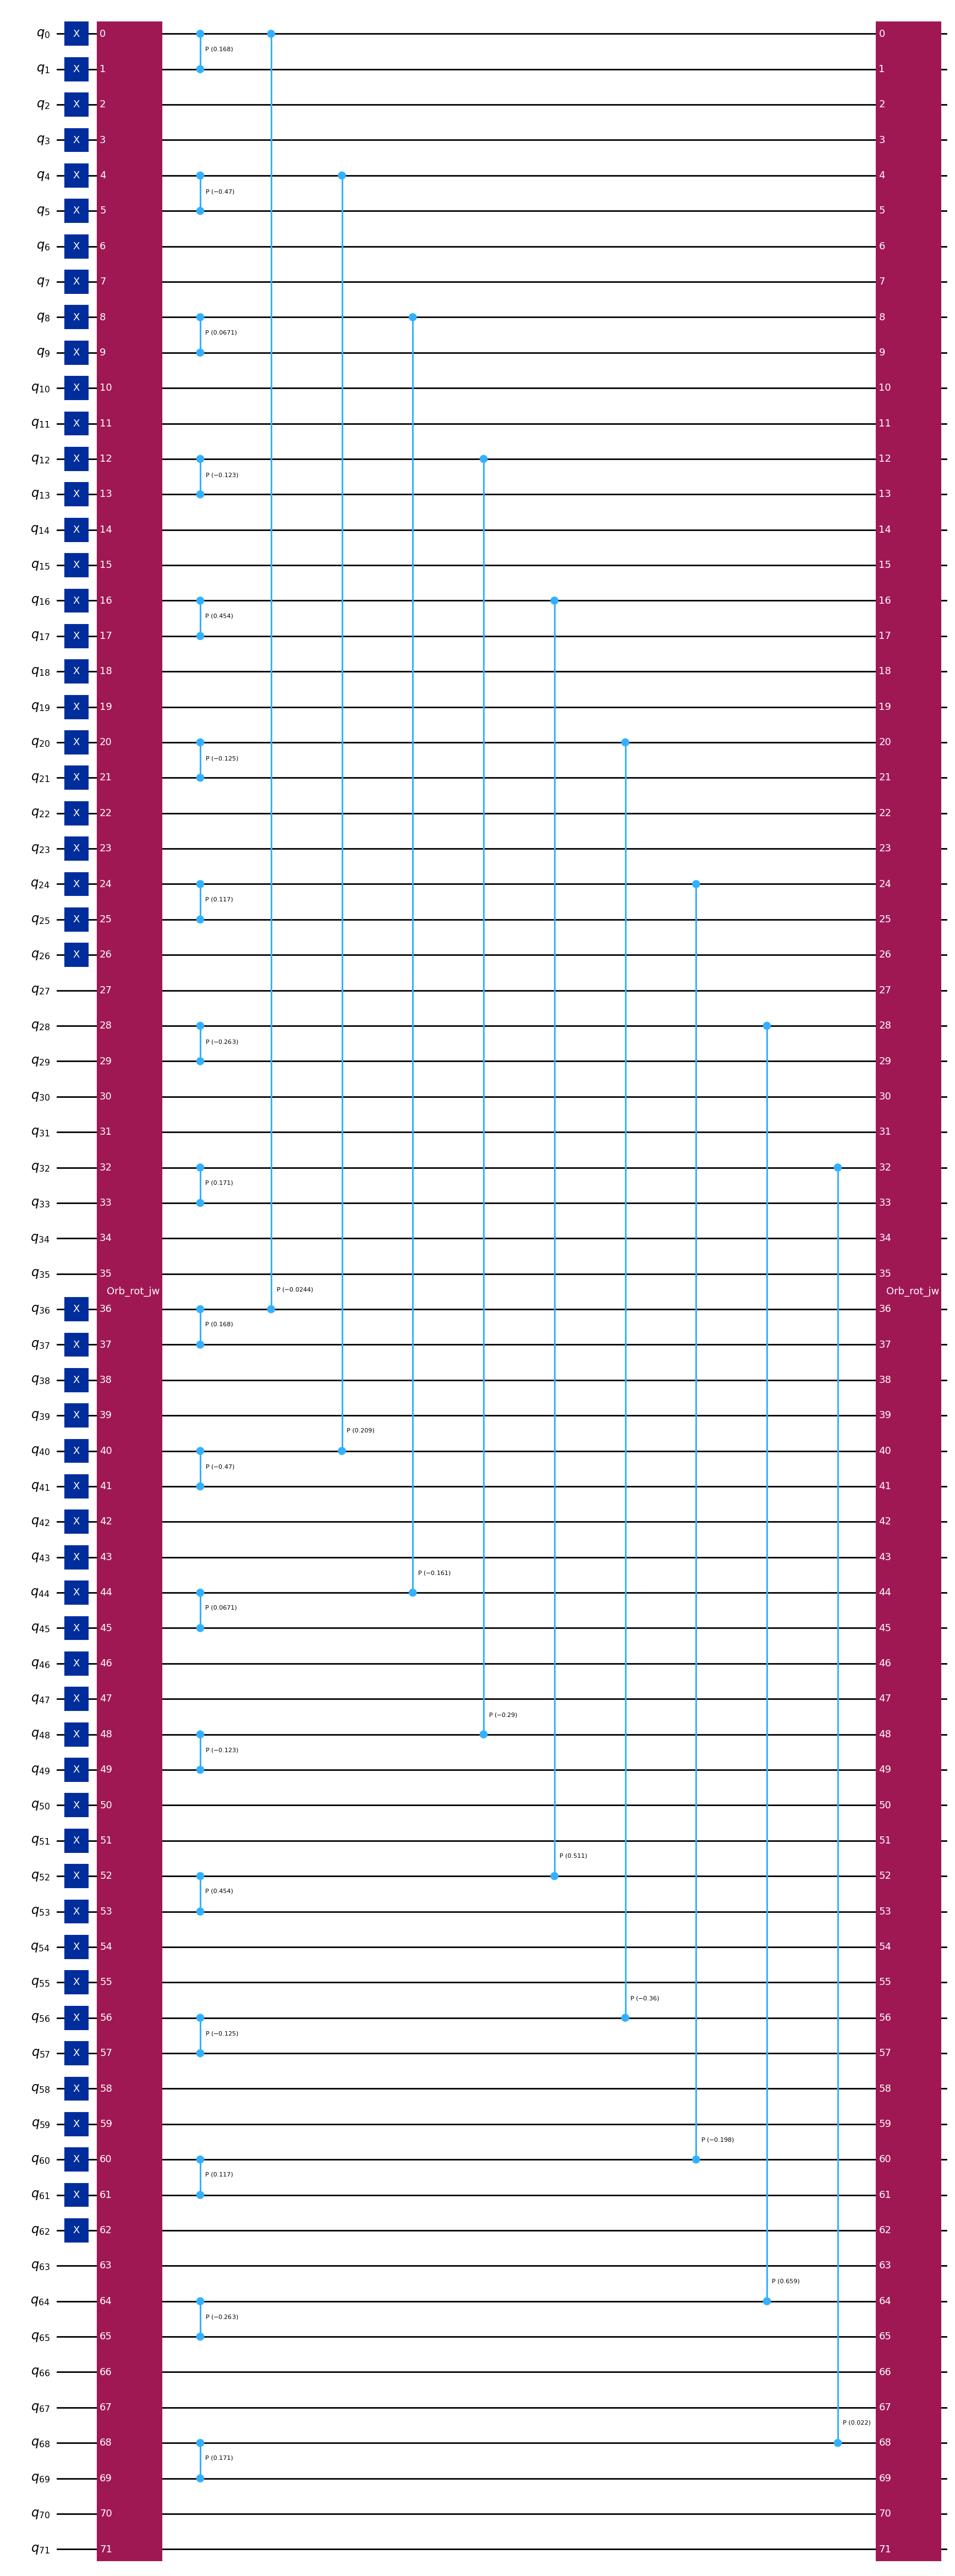

In [2]:
# delete the argument "output='mpl'" to see the circuit larger and in black and white
compatible.draw(fold=-1, output='mpl')

In [3]:
compatible.decompose(gates_to_decompose='orb_rot_jw').draw(fold=-1, output='mpl')